In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
df_X = pd.read_csv('./logistic_x.txt', sep='\ +',header=None, engine='python') #读取X值
ys = pd.read_csv('./logistic_y.txt', sep='\ +',header=None, engine='python') #读取y值
ys = ys.astype(int)
df_X['label'] = ys[0].values #将X按照y值的结果一一打标签
df_X.head()


,0,1,label
0,1.343250,-1.331148,0
1,1.820553,-0.634668,0
2,0.986321,-1.888576,0
3,1.944373,-1.635452,0
4,0.976734,-1.353315,0


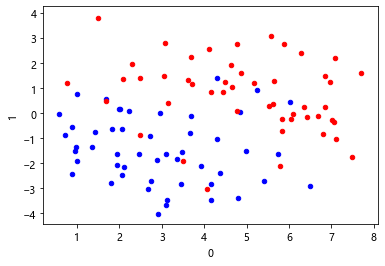

In [5]:
ax = plt.axes()
#在二维图中描绘X点所处位置，直观查看数据点的分布情况
df_X.query('label == 0').plot.scatter(x=0, y=1, ax=ax, color='blue')
df_X.query('label == 1').plot.scatter(x=0, y=1, ax=ax, color='red')

In [9]:
#提取用于学习的数据
Xs = df_X[[0, 1]].values
Xs = np.hstack([np.ones((Xs.shape[0], 1)), Xs]) 
ys = df_X['label'].values

用梯度下降法将相同的数据分类，画图和sklearn的结果相比较

In [10]:
from __future__ import print_function
import numpy as np
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(fit_intercept=False) #因为前面已经将截距项的值合并到变量中，此处参数设置不需要截距项
lr.fit(Xs, ys) #拟合
score = lr.score(Xs, ys) #结果评价
print("Coefficient: %s" % lr.coef_)
print("Score: %s" % score)

Coefficient: [[-1.70090239  0.55446442  1.07222662]]
Score: 0.898989898989899


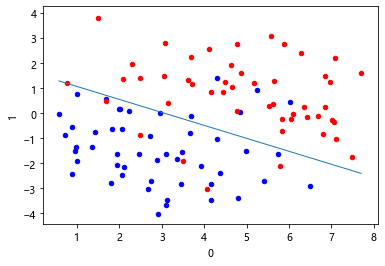

In [11]:
ax = plt.axes()

df_X.query('label == 0').plot.scatter(x=0, y=1, ax=ax, color='blue')
df_X.query('label == 1').plot.scatter(x=0, y=1, ax=ax, color='red')

_xs = np.array([np.min(Xs[:,1]), np.max(Xs[:,1])])

#将数据以二维图形式描点，并用学习得出的参数结果作为阈值，划分数据区域
_ys = (lr.coef_[0][0] + lr.coef_[0][1] * _xs) / (- lr.coef_[0][2])
plt.plot(_xs, _ys, lw=1)

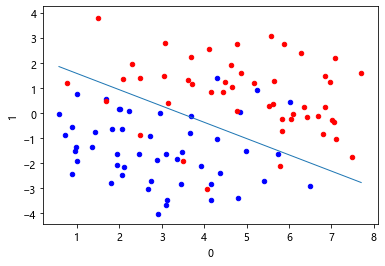

In [19]:
class LGR_GD():
    def __init__(self):
        self.w = None 
        self.n_iters = None
    def fit(self,X,y,alpha=0.03,loss = 1e-10): # 设定步长为0.002，判断是否收敛的条件为1e-10
        y = y.reshape(-1,1) #重塑y值的维度以便矩阵运算
        [m,d] = np.shape(X) #自变量的维度
        self.w = np.zeros((1,d)) #将参数的初始值定为0
        tol = 1e5
        self.n_iters = 0
        #============================= show me your code =======================
        while tol > loss: #设置收敛条件
            zs = X.dot(self.w.T)
            h_f = 1 / (1 + np.exp(-zs)) 
            theta = self.w + alpha *np.mean(X*(y - h_f),axis=0)
            tol = np.sum(np.abs(theta - self.w))
            self.w = theta #更新参数值
            self.n_iters += 1 #更新迭代次数
         #============================= show me your code =======================
    def predict(self, X):
        # 用已经拟合的参数值预测新自变量
        y_pred = X.dot(self.w)
        return y_pred  

lr_gd = LGR_GD()
lr_gd.fit(Xs,ys)

ax = plt.axes()

df_X.query('label == 0').plot.scatter(x=0, y=1, ax=ax, color='blue')
df_X.query('label == 1').plot.scatter(x=0, y=1, ax=ax, color='red')

_xs = np.array([np.min(Xs[:,1]), np.max(Xs[:,1])])
_ys = (lr_gd.w[0][0] + lr_gd.w[0][1] * _xs) / (- lr_gd.w[0][2])
plt.plot(_xs, _ys, lw=1)

In [31]:
import numpy as np

class LGR_NT():
    def __init__(self):
        self.w = None
        self.n_iters = None
    def fit(self,X,y,loss = 1e-10): # 判断是否收敛的条件为1e-10
        y = y.reshape(-1,1) #重塑y值的维度以便矩阵运算
        [m,d] = np.shape(X) #自变量的维度
        self.w = np.zeros((1,d)) #将参数的初始值定为0
        tol = 1e5
        n_iters =0
        Hessian = np.zeros((d,d))
        #============================= show me your code =======================
        while tol > loss:
            zs = X.dot(self.w.T)
            h_f = 1 / (1 + np.exp(-zs))
            grad = np.mean(X*(y - h_f),axis=0)
            for i in range(d):
                for j in range(d):
                    if j>=i:
                        Hessian[i][j] = np.mean(h_f*(h_f-1)*X[:,i]*X[:,j]) #更新海森矩阵中的值
                    else:
                        Hessian[i][j] = Hessian[j][i] #按海森矩阵的性质，对称点可直接得出结果
            theta = self.w - np.linalg.inv(Hessian).dot(grad)
            tol = np.sum(np.abs(theta - self.w))
            self.w = theta
            self.n_iters += 1
        #============================= show me your code =======================
        
    def predict(self, X):
        # 用已经拟合的参数值预测新自变量
        y_pred = X.dot(self.w)
        return y_pred 

lgr_nt = LGR_NT()
lgr_nt.fit(Xs,ys)

TypeError: unsupported operand type(s) for +=: 'NoneType' and 'int'

In [30]:
print("梯度下降法结果参数：%s;梯度下降法迭代次数：%s" %(lr_gd.w,lr_gd.n_iters))
print("牛顿法结果参数：%s;牛顿法迭代次数：%s" %(lgr_nt.w,lgr_nt.n_iters))

梯度下降法结果参数：[[-2.62051144  0.7603715   1.17194673]];梯度下降法迭代次数：32590
牛顿法结果参数：[[-2.6205116   0.76037154  1.17194674]];牛顿法迭代次数：None
